# Week 4, Fri, 4/25


## Interpretation of the coefficients


The coefficient can be interpreted as "the change in the target variable for a one-unit change in the predictor variable, holding other predictors constant".

**Does the size of the coefficient mean "importance"?**

This interpretation can make sense in some cases when the variables are of the same scale and "comparable". For example, if Y is the house price, and X1 is the size of the living room in square feet, X2 is the size of the garage in square feet. Then maybe the coefficient of X1 is larger than X2, and we can say that the size of the living room has more impact on the house price than the size of the garage.

Generally, the size of the coefficient is not a good indicator of the importance of the feature. The size of the coefficient is affected by the scale of the feature. If we change the unit of the feature, the coefficient will change accordingly. For example, if we change the unit of the feature from meters to centimeters, the coefficient will be 100 times larger. However, the importance of the feature does not change.

But we can ask the following question: 

**If we exclude or include a feature from the model, how much does the model performance decrease or increase?**

If the model performance decreases significantly when we exclude a feature, then we can consider the feature to be important in making predictions.

We would like to find the smallest set of features that give good performance. By selecting only a few features, the model is also easier to interpret: For example, for medical diagnosis, we would like to use as few features as possible to make the diagnosis instead of doing all the lab tests available.

Some methods to select the features include:

- **Best subset selection**: Try all possible subsets of features and choose the one that gives the best performance.

- **Forward selection**: Start with an empty set of features. Add the feature that gives the best performance. Continue adding features until the performance plateaus.

- **Backward selection**: Start with all features. Remove the feature that gives the smallest decrease in performance. Continue removing features until removing any feature significantly decreases the performance.

However, for the forward and backward selection, the result might depends on the order of adding/removing features. For example, suppose $Y = X_1 + X_2$. $X_3$ is highly correlated with $X_2$. Then both ($X_1$, $X_3$) and ($X_1$,$X_2$) are good models. If we start with all ($X_1$, $X_2$, $X_3$), we might end up with ($X_1$, $X_2$) or ($X_1$, $X_3$) depending on the order of considering the features.

# Polynomial regression


Given an input $x\in\mathbb{R}$, we can create other features such as $x^2$, $x^3$ ... $x^p$, etc.

We can fit a polynomial of degree $p$ to the data:

$$f(x) = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + ... + \beta_p x^p$$

This is sometimes called a polynomial regression, but it is still a linear regression: as we are seeking a linear combination of the polynomial features. The design matrix is:

$$X = \begin{bmatrix} 1 & x_1 & x_1^2 & x_1^3 & ... & x_1^p \\ 1 & x_2 & x_2^2 & x_2^3 & ... & x_2^p \\ ... & ... & ... & ... & ... & ... \\ 1 & x_N & x_N^2 & x_N^3 & ... & x_N^p \end{bmatrix}$$



Note that if we have $(x_0, y_0)$, $(x_1, y_1)$, ..., $(x_n, y_n)$, and the $x_i$'s are different, then there is always a polynomial of degree $n$ that passes through all the points. 
In this case, the design matrix is a square invertible matrix, and therefore $X\beta = y$ has a unique solution.
This is called interpolation.


In [3]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd
# fix random seed for reproducibility
np.random.seed(7)


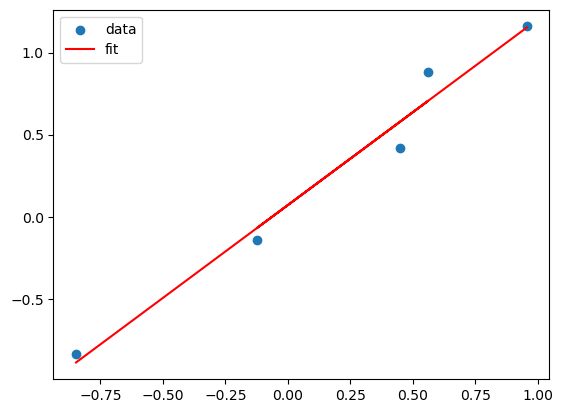

In [4]:
# Suppose the true model is a linear model of x

N = 5
X = np.random.uniform(-1,1,N)
Y = X + np.random.normal(0,0.1,N)

X = X.reshape(-1,1)
lreg_sklearn = linear_model.LinearRegression()
lreg_sklearn.fit(X,Y) 



plt.scatter(X,Y)
plt.plot(X, lreg_sklearn.predict(X), color='red')
plt.legend(['data', 'fit'])


[-1.1329286   6.40789176  3.50868941 -7.55811971] -0.36736931414942886


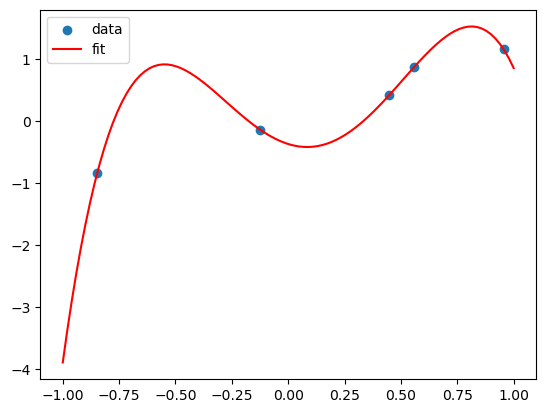

In [5]:
X_poly = np.hstack((X,X**2,X**3,X**4))
lreg_sklearn.fit(X_poly,Y) 
lreg_sklearn.score(X_poly,Y)


print(lreg_sklearn.coef_, lreg_sklearn.intercept_)
x_grid = np.linspace(-1,1,100) 
y_grid = lreg_sklearn.coef_[0]*x_grid + lreg_sklearn.coef_[1]*x_grid**2 + lreg_sklearn.coef_[2]*x_grid**3 + lreg_sklearn.coef_[3]*x_grid**4 + lreg_sklearn.intercept_
plt.scatter(X,Y)
plt.plot(x_grid, y_grid, color='red')
plt.legend(['data', 'fit'])

This polynomial can fit all the data! But is it a good fit?

This is called overfitting. We can add more and more features to fit the data, but this might not generalize well to new data.

To show this, we split the dataset into a training set and a test set. We fit the model on the training set and evaluate it on the test set.

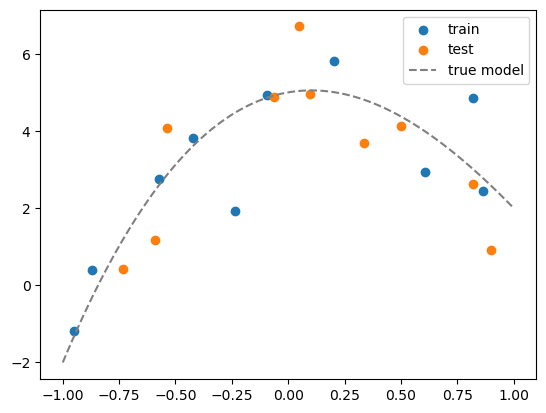

In [6]:
from sklearn.model_selection import train_test_split

# generate N data, this is the whole population
N = 20
x = np.random.uniform(-1,1,N)
Y = x + np.random.normal(0,0.1,N)
x = x.reshape(-1,1)


# maximum degree of the polynomial
degree = 8

# create a dataframe of all the polynomial features
X = np.hstack([x**i for i in range(degree+1)])

# convert to a pandas dataframe
df = pd.DataFrame(X, columns=['x%d'%i for i in range(degree+1)])
df.head()

# suppose the true model is a polynomial of degree 3
coeff = [5, 1, -5, 1]
df['y_true'] = sum([c*df[f'x{i}'] for i,c in enumerate(coeff)])

# add some noise to get data
df['y'] = df['y_true'] + np.random.normal(0,1,N)

# split the data into training and test sets 
df_train = df.iloc[:int(N/2)]
df_test = df.iloc[int(N/2):]

# visualize the data
plt.scatter(df_train['x1'], df_train['y'])
plt.scatter(df_test['x1'], df_test['y'])
# plot the true model
x_grid = np.linspace(-1,1,100)
y_grid = sum([c*x_grid**i for i,c in enumerate(coeff)])
plt.plot(x_grid, y_grid, color='gray', linestyle='--')
plt.legend(['train', 'test','true model'])

In [7]:
# For plotting, we need to create a grid of x values and its corresponding polynomial features
x_grid = np.linspace(-1,1,100).reshape(-1,1) 
X_grid = np.hstack([x_grid**i for i in range(degree+1)])
df_grid = pd.DataFrame(X_grid, columns=['x%d'%i for i in range(degree+1)])
df_grid.head()

x0        x1        x2        x3        x4        x5        x6        x7  \
0  1.0 -1.000000  1.000000 -1.000000  1.000000 -1.000000  1.000000 -1.000000   
1  1.0 -0.979798  0.960004 -0.940610  0.921608 -0.902989  0.884747 -0.866874   
2  1.0 -0.959596  0.920824 -0.883619  0.847918 -0.813658  0.780783 -0.749236   
3  1.0 -0.939394  0.882461 -0.828978  0.778737 -0.731541  0.687205 -0.645557   
4  1.0 -0.919192  0.844914 -0.776638  0.713879 -0.656192  0.603166 -0.554426   

         x8  
0  1.000000  
1  0.849361  
2  0.718964  
3  0.606432  
4  0.509624

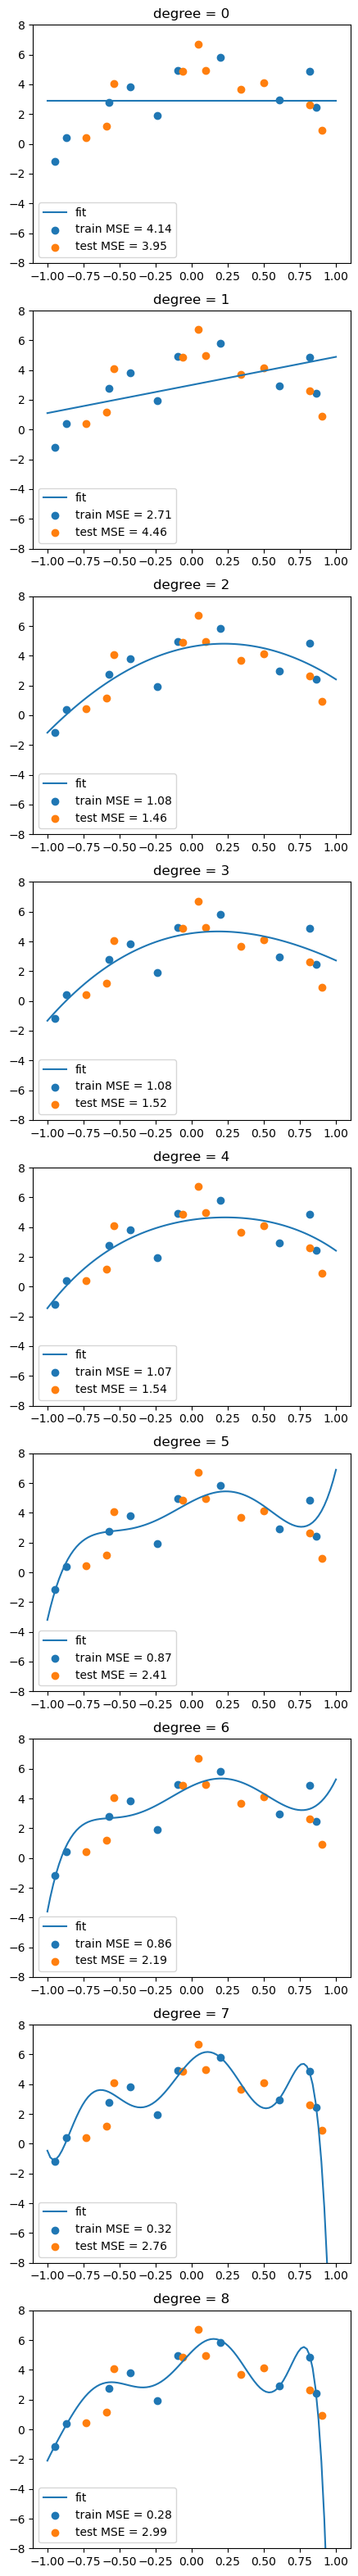

In [8]:
# for each degree, fit a polynomial model
from sklearn.metrics import mean_squared_error

# our features already include the constant term
lreg = linear_model.LinearRegression(fit_intercept=False)

train_mse = []
test_mse = []

fig, axs = plt.subplots(degree+1, 1, figsize=(5,degree*5))

# fit a polynomial model for each degree
for d in range(degree+1):

    # fit the model
    Xtrain_poly = df_train.iloc[:,:d+1]
    Xtest_poly = df_test.iloc[:,:d+1]
    
    lreg.fit(Xtrain_poly, df_train['y'])

    # calculate the MSE on training and test sets
    train_mse.append(mean_squared_error(df_train['y'], lreg.predict(Xtrain_poly)))
    test_mse.append(mean_squared_error(df_test['y'], lreg.predict(Xtest_poly)))

    # visualize the fit
    y_grid = lreg.predict(df_grid.iloc[:,:d+1])
    axs[d].plot(x_grid, y_grid)
    axs[d].scatter(df_train['x1'], df_train['y'])
    axs[d].scatter(df_test['x1'], df_test['y'])
    axs[d].set_title('degree = %d'%d)
    # show legend and MSE
    axs[d].legend(['fit', f'train MSE = {train_mse[-1]:.2f}', f'test MSE = {test_mse[-1]:.2f}'])
    axs[d].set_ylim(-8,8)


Text(0, 0.5, 'MSE')

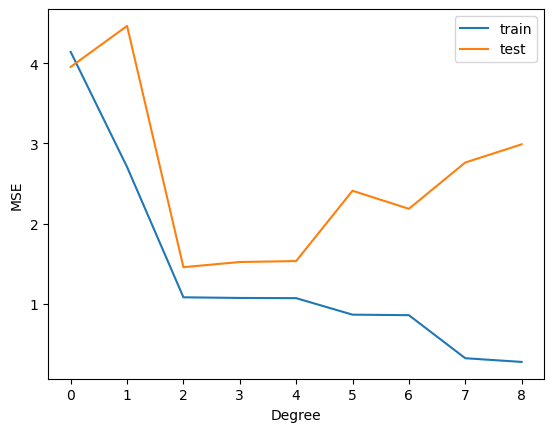

In [9]:
plt.plot(range(degree+1), train_mse)
plt.plot(range(degree+1), test_mse)
plt.legend(['train', 'test'])
plt.xticks(range(degree+1))
plt.xlabel('Degree')
plt.ylabel('MSE')